# Papoulis

    TODO

In [1]:
import sympy
import sympy.functions.elementary.exponential as symExp
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt
from visuals import *

In [2]:
c, t, U = sympy.symbols('c, t, U')

In [3]:
f = c*symExp.exp(-c*t)
f

c*exp(-c*t)

In [4]:
int_f = sympy.integrate(f, (t, 0, t))
int_f
sympy.oo

oo

In [5]:
q = sympy.integrate(f, t)
q

-exp(-c*t)

sympy.limit(q, t, sympy.oo)

$\infty$

In [6]:
temp = int_f.subs({c:1, U:1})
temp

1 - exp(-t)

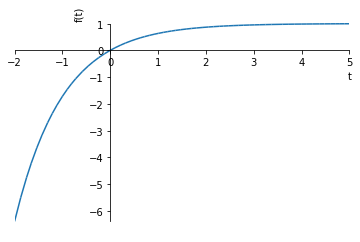

In [7]:
p = plot(temp, (t, -2, 5), show=False)
p.show()

In [8]:
from sympy.utilities.lambdify import lambdify
func = lambdify(t, temp, 'numpy') # returns a numpy-ready function1

In [9]:

interval = np.linspace(-1, 5, num=1000)
values = func(interval)

def pdfInfo(interval, values, rng, xlim=None):
    fig, ax = plt.subplots()
    ax.plot(interval, values, 'k')
    
    if not np.isscalar(rng) and len(rng)==1:
        rng = rng[0]
    
    if not np.isscalar(rng):
        x_1 = np.argmax(interval>rng[0])
        x_2 = np.argmax(interval>rng[1])
        ax.fill_between(np.linspace(rng[0], rng[1], num=len(values[x_1:x_2])), values[x_1:x_2], color='k')
    else:
        x = np.argmax(interval>rng)
        x_0 = interval[0]
        ax.fill_between(np.linspace(x_0, rng, num=len(values[0:x])), values[0:x], color='k')
        
    ax.axhline(0, c='k', alpha=.5)
    ax.axvline(0, c='k', alpha=.5)
         
    ax.yaxis.grid(b=True, which='minor', color='k', linestyle='--', alpha=.2, zorder=0) 
    ax.yaxis.grid(b=True, which='major', color='k', linestyle='--', alpha=.5, zorder=0) 

    ax.set_facecolor('xkcd:white')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    if xlim != None:
         ax.set_xlim(xlim)

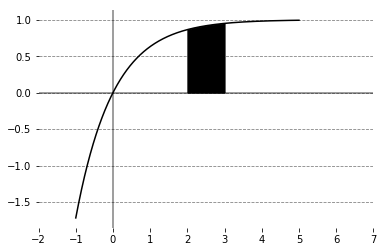

In [10]:
pdfInfo(interval, values, [2, 3], xlim=[-2, 7])